# Exploratory Analysis – National Aadhaar Service Trends

## Overview
This notebook performs exploratory analysis on the unified master analytical table created from
Enrollment, Demographic Update, and Biometric Update datasets.

The primary focus of this notebook is to analyze **national-level trends** in Aadhaar service demand
over time, providing a macro-level view of system usage.

## Objectives
The objectives of this notebook are to:
1. Understand overall Aadhaar service demand trends at the national level
2. Compare enrollment demand with update-related demand
3. Identify temporal patterns, peaks, and shifts in service usage

## Scope
- Analysis is limited to national-level aggregation in this notebook
- No state-level comparisons are performed here
- No predictive modeling is applied
- Visualizations are used to support descriptive insights

## Input Dataset

03_Processed_Data/analysis_master_table.csv

This notebook is exploratory in nature and is intended to surface insights
that inform deeper regional and policy analysis.

## Step 1: Loading the Master Analytical Table

In this step, the master analytical table created during the data preparation phase
is loaded into the analysis environment. This table serves as the single source of truth
for all exploratory analysis performed in this notebook.

In [56]:
import pandas as pd
from pathlib import Path

pd.set_option("display.max_columns", None)
pd.set_option("display.width", 120)

# Define processed data directory
DATA_DIR = Path("../03_Processed_Data")

# Load master analytical table
master = pd.read_csv(DATA_DIR / "analysis_master_table.csv", parse_dates=["date"])

# Quick structural check
master.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3829 entries, 0 to 3828
Data columns (total 5 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   date                       3829 non-null   datetime64[ns]
 1   state                      3829 non-null   object        
 2   total_enrollment           3829 non-null   int64         
 3   total_demographic_updates  3829 non-null   int64         
 4   total_biometric_updates    3829 non-null   int64         
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 149.7+ KB


## Step 2: Creating National-Level Daily Aggregates

To analyze national UIDAI service demand, state-level data is aggregated to the daily national level.
This aggregation enables a clear view of overall system load and temporal trends across services.


In [57]:
# Aggregate to national daily level
national_daily = (
    master
    .groupby("date", as_index=False)
    .agg(
        total_enrollment=("total_enrollment", "sum"),
        total_demographic_updates=("total_demographic_updates", "sum"),
        total_biometric_updates=("total_biometric_updates", "sum")
    )
)

# Preview national daily aggregates
national_daily.head()

,date,total_enrollment,total_demographic_updates,total_biometric_updates
0,2025-03-01,0,11141194,8314997
1,2025-03-02,109,0,0
2,2025-03-09,3404,0,0
3,2025-03-15,3102,0,0
4,2025-03-20,6218,0,0


In [58]:
national_daily.shape

(115, 4)

In [59]:
national_daily.describe()

,date,total_enrollment,total_demographic_updates,total_biometric_updates
count,115,115.000000,1.150000e+02,1.150000e+02
mean,2025-10-06 12:31:18.260869632,47242.843478,4.284414e+05,6.061218e+05
min,2025-03-01 00:00:00,0.000000,0.000000e+00,0.000000e+00
25%,2025-09-15 12:00:00,791.500000,1.298510e+05,2.529000e+03
50%,2025-10-27 00:00:00,40289.000000,3.183910e+05,3.157300e+05
75%,2025-11-30 00:00:00,59739.000000,4.481935e+05,4.170670e+05
max,2025-12-31 00:00:00,616868.000000,1.114119e+07,9.785768e+06
std,NaN,70306.255021,1.060340e+06,1.706055e+06


## Step 3: Visualizing National UIDAI Service Trends Over Time

This step visualizes national-level daily trends for:
- Aadhaar Enrollments
- Demographic Updates
- Biometric Updates

Line plots are used to observe temporal patterns, relative service volumes,
and demand spikes across the study period.


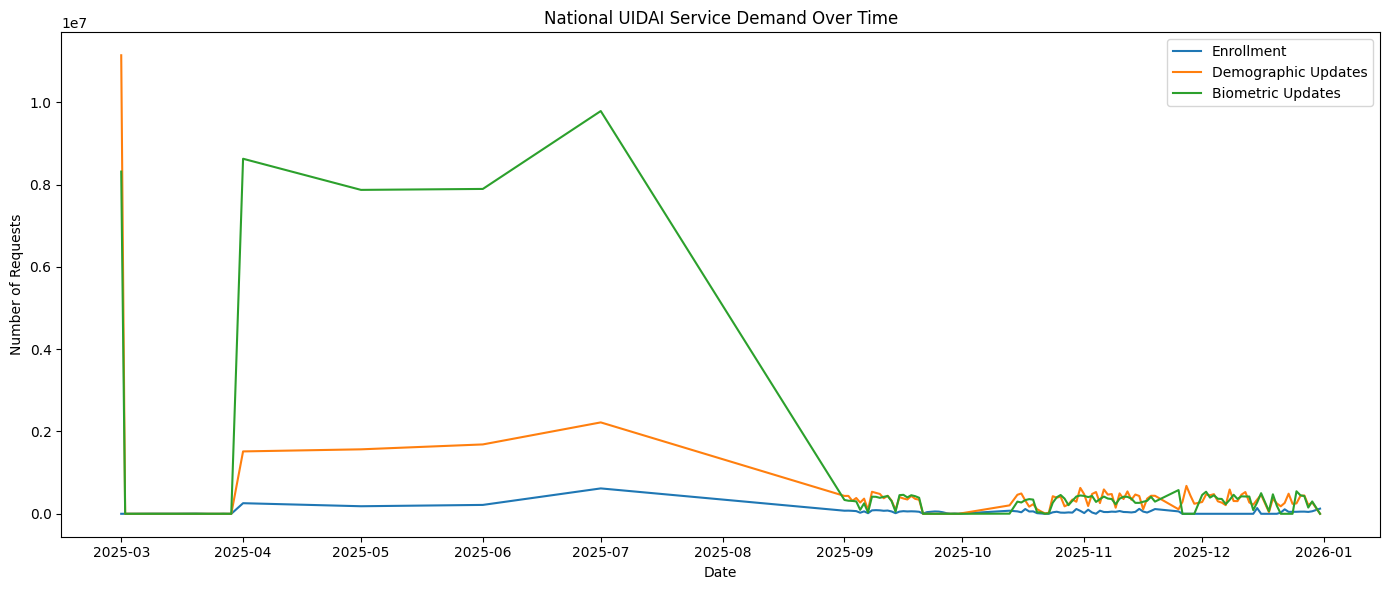

In [60]:
import matplotlib.pyplot as plt

# Sort by date to ensure correct plotting
national_daily = national_daily.sort_values("date")

plt.figure(figsize=(14, 6))
plt.plot(national_daily["date"], national_daily["total_enrollment"], label="Enrollment")
plt.plot(national_daily["date"], national_daily["total_demographic_updates"], label="Demographic Updates")
plt.plot(national_daily["date"], national_daily["total_biometric_updates"], label="Biometric Updates")

plt.xlabel("Date")
plt.ylabel("Number of Requests")
plt.title("National UIDAI Service Demand Over Time")
plt.legend()
plt.tight_layout()
plt.show()

## Step 4: Smoothed National Trends Using Rolling Averages

Daily national UIDAI service demand exhibits significant volatility.
To better observe underlying temporal trends, rolling averages are applied
to smooth short-term fluctuations while preserving overall demand patterns.

A 7-day rolling window is used to represent short-term operational trends.


In [61]:
# Create a copy for rolling calculations
national_smoothed = national_daily.copy()

# Apply 7-day rolling average
window = 7
national_smoothed["enrollment_7d_avg"] = (
    national_smoothed["total_enrollment"].rolling(window=window).mean()
)
national_smoothed["demographic_7d_avg"] = (
    national_smoothed["total_demographic_updates"].rolling(window=window).mean()
)
national_smoothed["biometric_7d_avg"] = (
    national_smoothed["total_biometric_updates"].rolling(window=window).mean()
)

national_smoothed.head(10)

,date,total_enrollment,total_demographic_updates,total_biometric_updates,enrollment_7d_avg,demographic_7d_avg,biometric_7d_avg
0,2025-03-01,0,11141194,8314997,NaN,NaN,NaN
1,2025-03-02,109,0,0,NaN,NaN,NaN
2,2025-03-09,3404,0,0,NaN,NaN,NaN
3,2025-03-15,3102,0,0,NaN,NaN,NaN
4,2025-03-20,6218,0,0,NaN,NaN,NaN
5,2025-03-23,576,0,0,NaN,NaN,NaN
6,2025-03-26,211,0,0,1945.714286,1.591599e+06,1.187857e+06
7,2025-03-27,2704,0,0,2332.000000,0.000000e+00,0.000000e+00
8,2025-03-28,191,0,0,2343.714286,0.000000e+00,0.000000e+00
9,2025-03-29,67,0,0,1867.000000,0.000000e+00,0.000000e+00


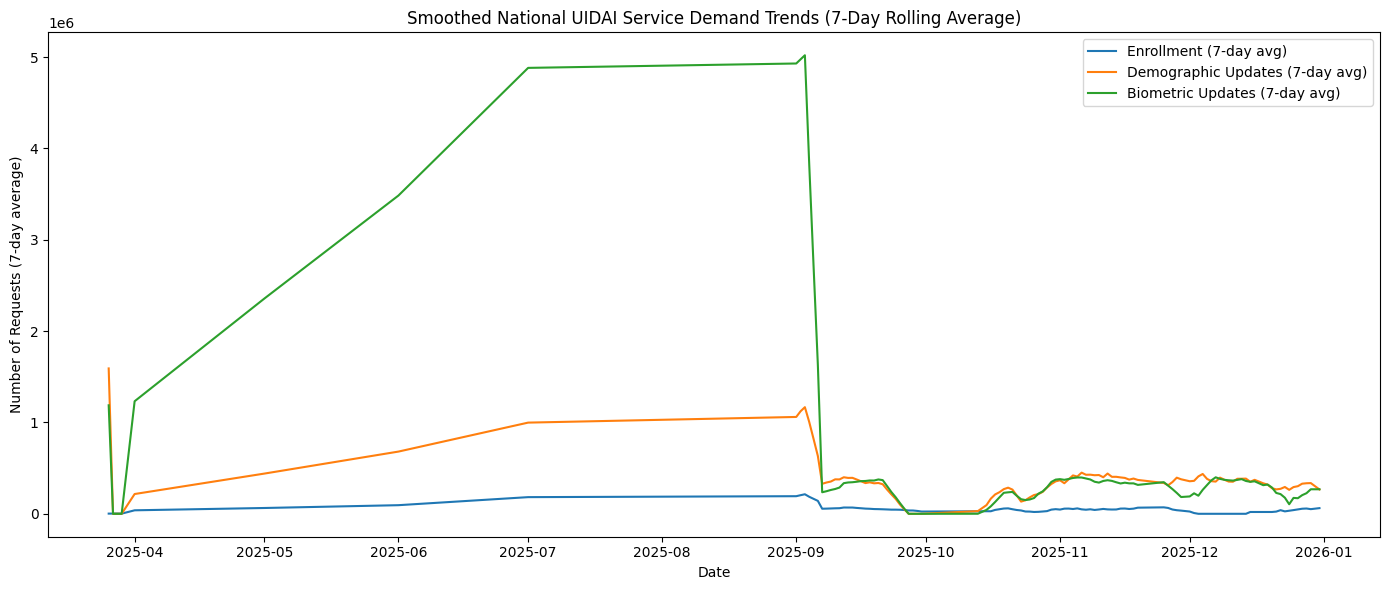

In [62]:
plt.figure(figsize=(14, 6))
plt.plot(
    national_smoothed["date"],
    national_smoothed["enrollment_7d_avg"],
    label="Enrollment (7-day avg)"
)
plt.plot(
    national_smoothed["date"],
    national_smoothed["demographic_7d_avg"],
    label="Demographic Updates (7-day avg)"
)
plt.plot(
    national_smoothed["date"],
    national_smoothed["biometric_7d_avg"],
    label="Biometric Updates (7-day avg)"
)

plt.xlabel("Date")
plt.ylabel("Number of Requests (7-day average)")
plt.title("Smoothed National UIDAI Service Demand Trends (7-Day Rolling Average)")
plt.legend()
plt.tight_layout()
plt.show()


## Step 5: National UIDAI Service Mix Analysis

This step examines the relative composition of UIDAI service demand over time.
Rather than absolute volumes, the focus is on the proportion of total demand
accounted for by enrollments, demographic updates, and biometric updates.

Service mix analysis helps identify structural shifts in operational workload.

In [63]:
# Calculate total daily demand
national_daily["total_demand"] = (
    national_daily["total_enrollment"]
    + national_daily["total_demographic_updates"]
    + national_daily["total_biometric_updates"]
)

# Compute service shares
national_daily["enrollment_share"] = national_daily["total_enrollment"] / national_daily["total_demand"]
national_daily["demographic_share"] = national_daily["total_demographic_updates"] / national_daily["total_demand"]
national_daily["biometric_share"] = national_daily["total_biometric_updates"] / national_daily["total_demand"]

national_daily.head()

,date,total_enrollment,total_demographic_updates,total_biometric_updates,total_demand,enrollment_share,demographic_share,biometric_share
0,2025-03-01,0,11141194,8314997,19456191,0.0,0.57263,0.42737
1,2025-03-02,109,0,0,109,1.0,0.00000,0.00000
2,2025-03-09,3404,0,0,3404,1.0,0.00000,0.00000
3,2025-03-15,3102,0,0,3102,1.0,0.00000,0.00000
4,2025-03-20,6218,0,0,6218,1.0,0.00000,0.00000


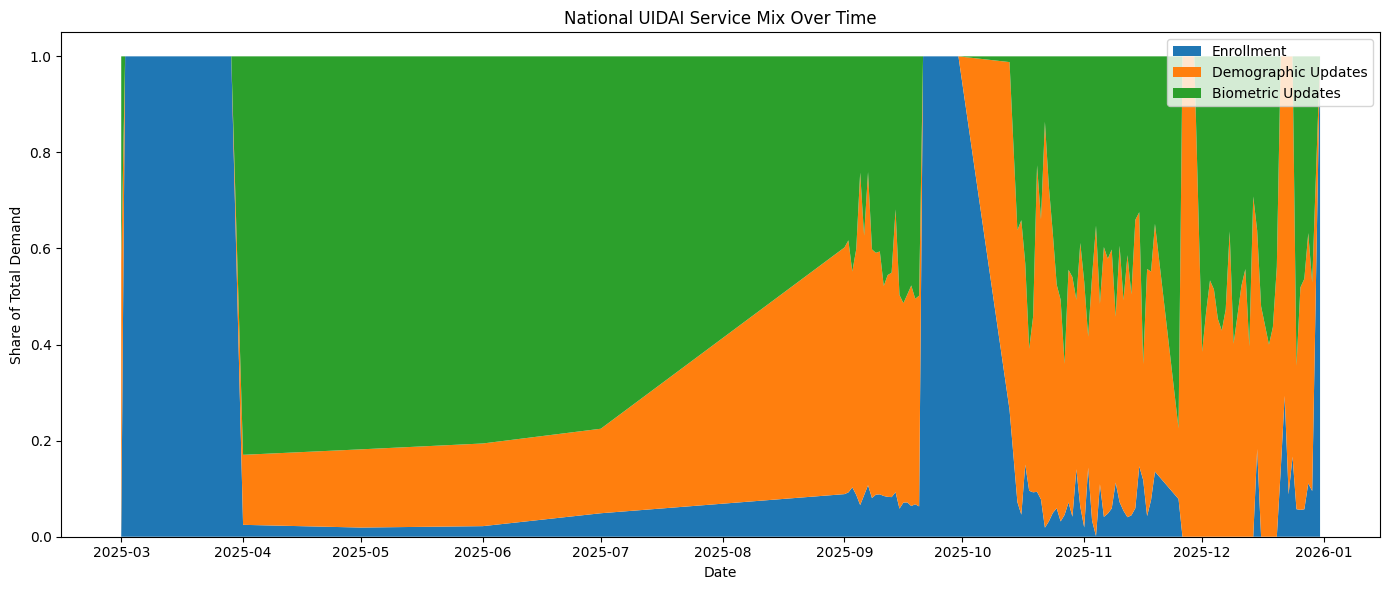

In [64]:
plt.figure(figsize=(14, 6))
plt.stackplot(
    national_daily["date"],
    national_daily["enrollment_share"],
    national_daily["demographic_share"],
    national_daily["biometric_share"],
    labels=["Enrollment", "Demographic Updates", "Biometric Updates"]
)

plt.xlabel("Date")
plt.ylabel("Share of Total Demand")
plt.title("National UIDAI Service Mix Over Time")
plt.legend(loc="upper right")
plt.tight_layout()
plt.show()

## Step 6: Distribution of Total UIDAI Demand Across States

This step analyzes how total UIDAI service demand is distributed across states.
Visualizing demand distribution helps assess whether UIDAI workload is evenly spread
or concentrated among a small number of high-demand states.

Such distributional insights are important for designing efficient,
region-aware operational and policy interventions.

In [65]:
# Aggregate total demand by state across the entire period
state_totals = (
    master
    .assign(
        total_demand=lambda df: (
            df["total_enrollment"]
            + df["total_demographic_updates"]
            + df["total_biometric_updates"]
        )
    )
    .groupby("state", as_index=False)
    .agg(
        total_enrollment=("total_enrollment", "sum"),
        total_demographic_updates=("total_demographic_updates", "sum"),
        total_biometric_updates=("total_biometric_updates", "sum"),
        total_demand=("total_demand", "sum")
    )
    .sort_values("total_demand", ascending=False)
)

state_totals.head(10)

,state,total_enrollment,total_demographic_updates,total_biometric_updates,total_demand
33,Uttar Pradesh,1018629,8542328,9577735,19138692
20,Maharashtra,369139,5054603,9226139,14649881
4,Bihar,609585,4814352,4897587,10321524
19,Madhya Pradesh,493970,2912938,5923771,9330679
28,Rajasthan,348458,2817617,3994955,7161030
30,Tamil Nadu,220789,2212229,4698118,7131136
35,West Bengal,375340,3872737,2524619,6772696
1,Andhra Pradesh,127686,2295584,3714633,6137903
10,Gujarat,280549,1824327,3196514,5301390
6,Chhattisgarh,103219,2005438,2648734,4757391


In [66]:
state_totals.describe()

,total_enrollment,total_demographic_updates,total_biometric_updates,total_demand
count,3.600000e+01,3.600000e+01,3.600000e+01,3.600000e+01
mean,1.509146e+05,1.368632e+06,1.936223e+06,3.455769e+06
std,2.133379e+05,1.837860e+06,2.443577e+06,4.404592e+06
min,2.030000e+02,1.176000e+03,4.820000e+03,6.199000e+03
25%,5.530500e+03,4.062725e+04,8.434000e+04,1.616198e+05
50%,8.476850e+04,8.134235e+05,1.120232e+06,2.327590e+06
75%,2.214005e+05,1.869605e+06,2.639149e+06,4.893391e+06
max,1.018629e+06,8.542328e+06,9.577735e+06,1.913869e+07


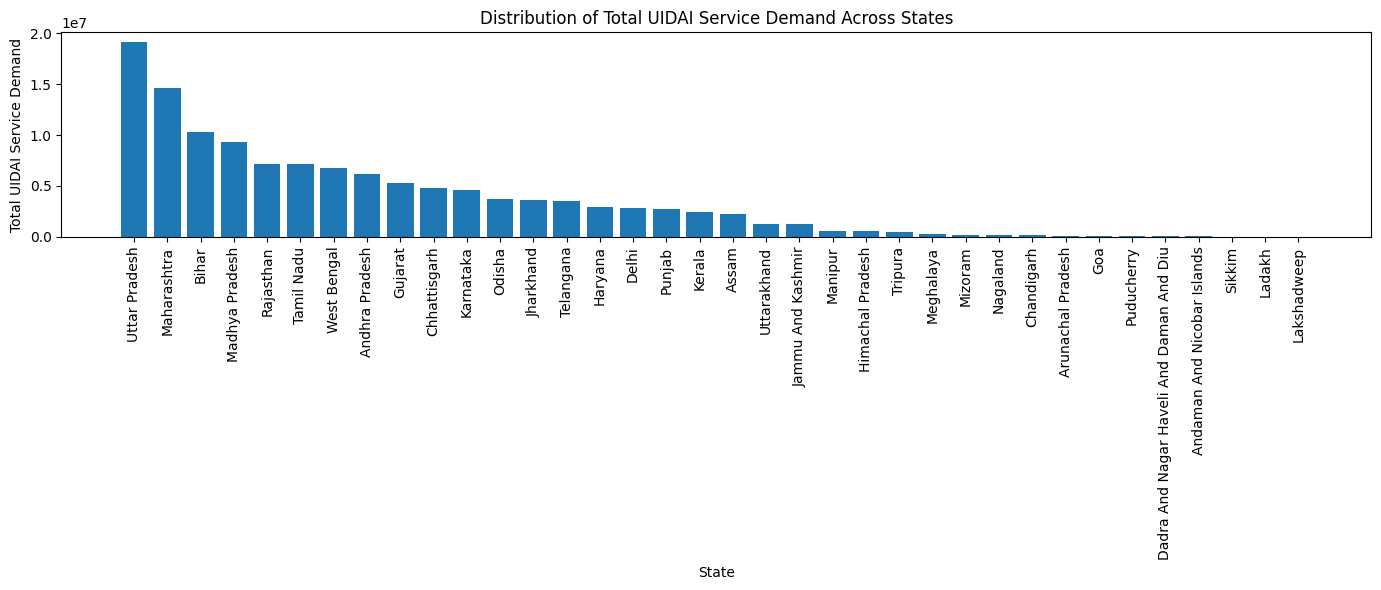

In [67]:
plt.figure(figsize=(14, 6))
plt.bar(
    state_totals["state"],
    state_totals["total_demand"]
)

plt.xlabel("State")
plt.ylabel("Total UIDAI Service Demand")
plt.title("Distribution of Total UIDAI Service Demand Across States")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

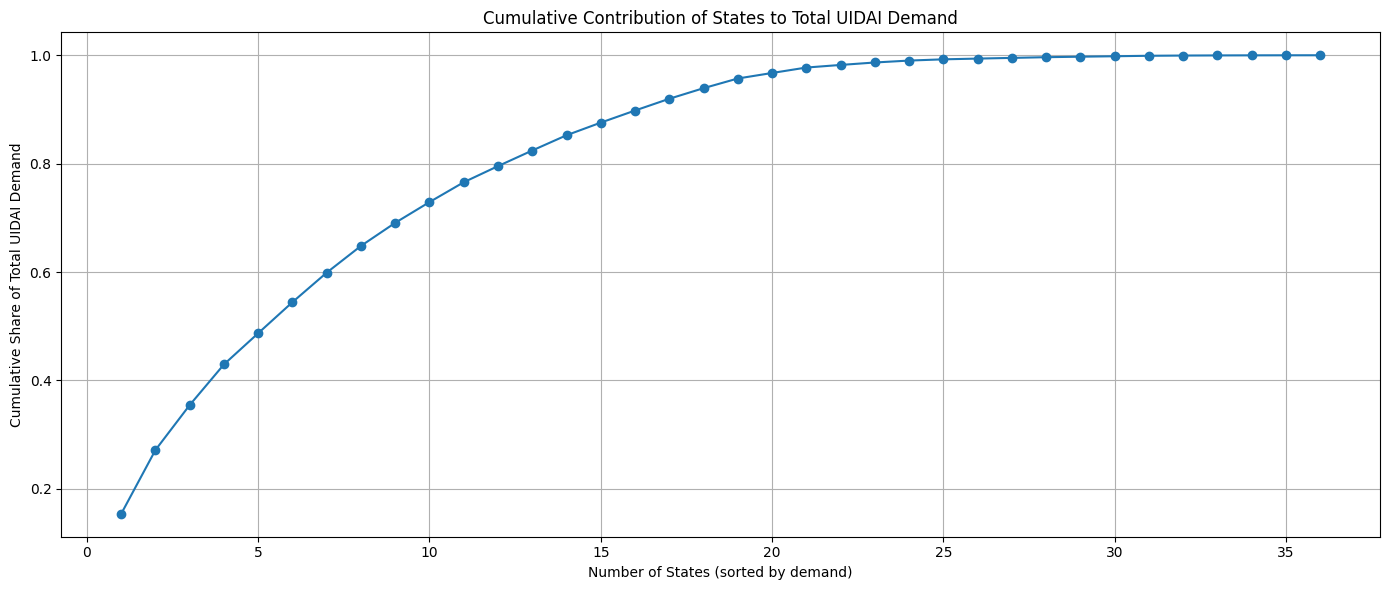

In [68]:
# Calculate cumulative share
state_totals_sorted = state_totals.copy()
state_totals_sorted["cumulative_share"] = (
    state_totals_sorted["total_demand"].cumsum()
    / state_totals_sorted["total_demand"].sum()
)

plt.figure(figsize=(14, 6))
plt.plot(
    range(1, len(state_totals_sorted) + 1),
    state_totals_sorted["cumulative_share"],
    marker="o"
)

plt.xlabel("Number of States (sorted by demand)")
plt.ylabel("Cumulative Share of Total UIDAI Demand")
plt.title("Cumulative Contribution of States to Total UIDAI Demand")
plt.grid(True)
plt.tight_layout()
plt.show()

## Step 7: State-Level UIDAI Service Mix Comparison

This step examines how UIDAI service demand is distributed across service types
(enrollment, demographic updates, biometric updates) for each state.

Analyzing service mix at the state level helps identify:
- States dominated by enrollment activity
- States dominated by update activity
- Regional differences in UIDAI operational workload


In [69]:
# Calculate service share percentages at state level
state_mix = state_totals.copy()

state_mix["enrollment_share"] = state_mix["total_enrollment"] / state_mix["total_demand"]
state_mix["demographic_share"] = state_mix["total_demographic_updates"] / state_mix["total_demand"]
state_mix["biometric_share"] = state_mix["total_biometric_updates"] / state_mix["total_demand"]

# Sort by biometric share (descending) for insight
state_mix_sorted = state_mix.sort_values("biometric_share", ascending=False)

state_mix_sorted.head(10)

,state,total_enrollment,total_demographic_updates,total_biometric_updates,total_demand,enrollment_share,demographic_share,biometric_share
18,Lakshadweep,203,1176,4820,6199,0.032747,0.189708,0.777545
7,Dadra And Nagar Haveli And Daman And Diu,1799,12204,39268,53271,0.033771,0.229093,0.737137
0,Andaman And Nicobar Islands,511,7246,20698,28455,0.017958,0.254648,0.727394
23,Mizoram,5926,41906,120329,168161,0.035240,0.249202,0.715558
12,Himachal Pradesh,17486,149214,396234,562934,0.031062,0.265065,0.703873
24,Nagaland,15587,36791,109593,161971,0.096233,0.227146,0.676621
25,Odisha,122987,1112065,2464960,3700012,0.033240,0.300557,0.666203
16,Kerala,75002,744952,1609730,2429684,0.030869,0.306604,0.662526
32,Tripura,11285,138013,292155,441453,0.025563,0.312634,0.661803
26,Puducherry,3017,32763,69908,105688,0.028546,0.309997,0.661456


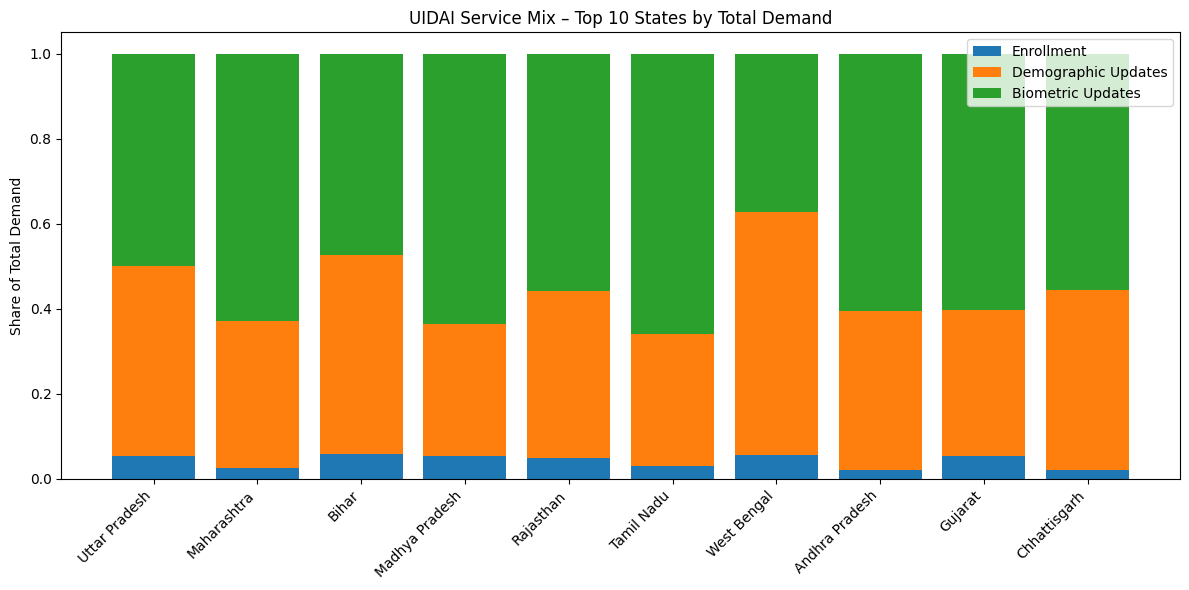

In [70]:
# Select top 10 states by total demand
top_states = (
    state_mix
    .sort_values("total_demand", ascending=False)
    .head(10)
)

plt.figure(figsize=(12, 6))
plt.bar(top_states["state"], top_states["enrollment_share"], label="Enrollment")
plt.bar(
    top_states["state"],
    top_states["demographic_share"],
    bottom=top_states["enrollment_share"],
    label="Demographic Updates"
)
plt.bar(
    top_states["state"],
    top_states["biometric_share"],
    bottom=top_states["enrollment_share"] + top_states["demographic_share"],
    label="Biometric Updates"
)

plt.ylabel("Share of Total Demand")
plt.title("UIDAI Service Mix – Top 10 States by Total Demand")
plt.xticks(rotation=45, ha="right")
plt.legend()
plt.tight_layout()
plt.show()

## Step 8: State-Level Temporal Trends for High-Demand States

This step analyzes how UIDAI service demand evolves over time for the highest-demand states.
State-level temporal trends help determine whether national demand patterns are driven
uniformly across regions or influenced by a subset of states.

The analysis focuses on the top states by total UIDAI demand.


In [71]:
# Select top 5 states by total demand
top_states_list = (
    state_totals
    .sort_values("total_demand", ascending=False)
    .head(5)["state"]
    .tolist()
)

top_states_list

['Uttar Pradesh', 'Maharashtra', 'Bihar', 'Madhya Pradesh', 'Rajasthan']

In [72]:
# Filter master table for top states
top_states_ts = (
    master[master["state"].isin(top_states_list)]
    .groupby(["date", "state"], as_index=False)
    .agg(
        total_demand=("total_enrollment", "sum")
    )
)

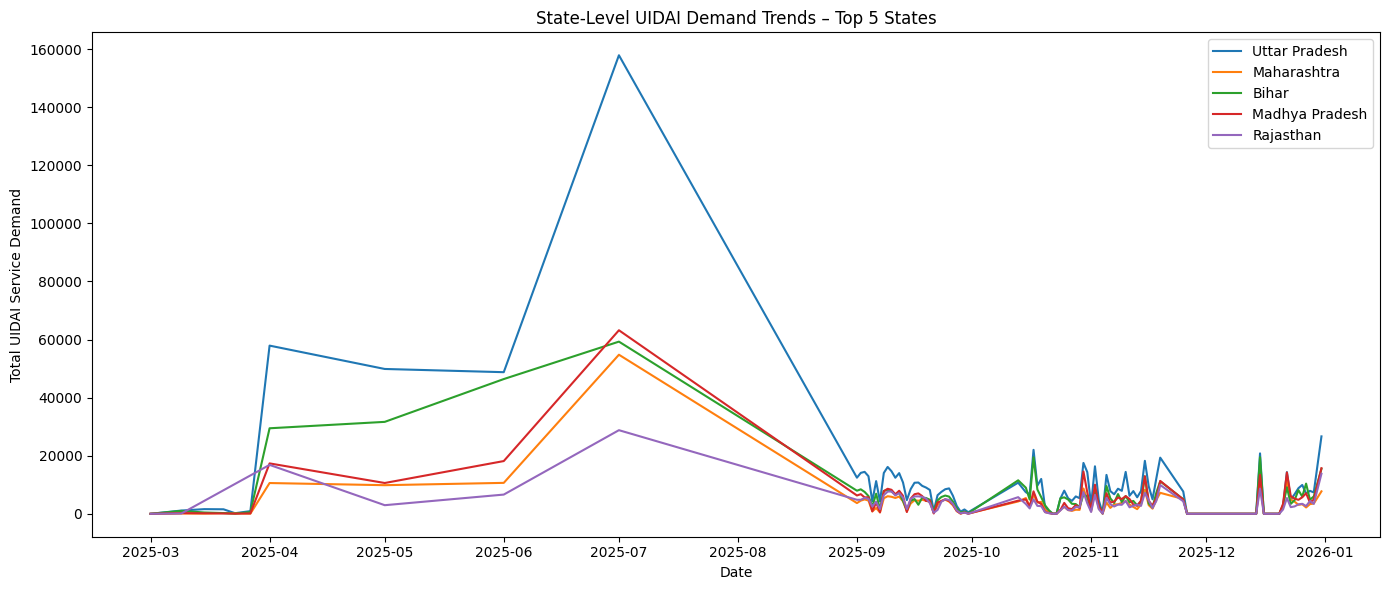

In [73]:
plt.figure(figsize=(14, 6))

for state in top_states_list:
    state_data = top_states_ts[top_states_ts["state"] == state]
    plt.plot(state_data["date"], state_data["total_demand"], label=state)

plt.xlabel("Date")
plt.ylabel("Total UIDAI Service Demand")
plt.title("State-Level UIDAI Demand Trends – Top 5 States")
plt.legend()
plt.tight_layout()
plt.show()